In [73]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import explained_variance_score

from math import sqrt

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from xgboost import XGBRegressor


In [2]:
df=pd.read_csv(r'C:\Users\kogla\OneDrive\SWE599-Flight-Ticket-Price-Estimation-Project\merged.csv').drop("Unnamed: 0", axis=1)
df.head()

,company,departure_airport,arrival_airport,departure_time,arrival_time,departure_date,price_try,departure_week_day,checked_week_day,departure_day,departure_month,remaining_day_to_flight,arrival_city,departure_airport_name,departure_hour,part_of_day,is_weekend,part_of_month,duration(min)
0,AnadoluJet,SAW,ADB,07:30:00,08:40:00,2022-11-14,506.99,Monday,Tuesday,14,11,13,Izmir,Sabiha Gökçen Airport,7,Early Morning,Weekday,Middle,70
1,AnadoluJet,SAW,ADB,09:20:00,10:30:00,2022-11-14,506.99,Monday,Tuesday,14,11,13,Izmir,Sabiha Gökçen Airport,9,Morning,Weekday,Middle,70
2,AnadoluJet,SAW,ADB,20:55:00,22:05:00,2022-11-14,506.99,Monday,Tuesday,14,11,13,Izmir,Sabiha Gökçen Airport,20,Evening,Weekday,Middle,70
3,Pegasus,SAW,ADB,23:35:00,00:45:00,2022-11-14,539.99,Monday,Tuesday,14,11,13,Izmir,Sabiha Gökçen Airport,23,Night,Weekday,Middle,70
4,Pegasus,SAW,ADB,09:10:00,10:20:00,2022-11-14,542.99,Monday,Tuesday,14,11,13,Izmir,Sabiha Gökçen Airport,9,Morning,Weekday,Middle,70


In [3]:
df=df.drop(['departure_airport', 'arrival_airport', 'departure_date','departure_time', 'arrival_time'], axis=1)

In [4]:
df['company'] = df.company.astype('category')
df['departure_airport_name'] = df.departure_airport_name.astype('category')
df['arrival_city'] = df.arrival_city.astype('category')
df['part_of_day'] = df.part_of_day.astype('category')
df['departure_week_day'] = df.departure_week_day.astype('category')
df['part_of_month'] = df.part_of_month.astype('category')
df['is_weekend'] = df.is_weekend.astype('category')
df['checked_week_day'] = df.checked_week_day.astype('category')
df["price_try"] = df["price_try"].astype("int64")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129513 entries, 0 to 129512
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   company                  129513 non-null  category
 1   price_try                129513 non-null  int64   
 2   departure_week_day       129513 non-null  category
 3   checked_week_day         129513 non-null  category
 4   departure_day            129513 non-null  int64   
 5   departure_month          129513 non-null  int64   
 6   remaining_day_to_flight  129513 non-null  int64   
 7   arrival_city             129513 non-null  category
 8   departure_airport_name   129513 non-null  category
 9   departure_hour           129513 non-null  int64   
 10  part_of_day              129513 non-null  category
 11  is_weekend               129513 non-null  category
 12  part_of_month            129513 non-null  category
 13  duration(min)            129513 non-null  in

In [5]:
df.head()

,company,price_try,departure_week_day,checked_week_day,departure_day,departure_month,remaining_day_to_flight,arrival_city,departure_airport_name,departure_hour,part_of_day,is_weekend,part_of_month,duration(min)
0,AnadoluJet,506,Monday,Tuesday,14,11,13,Izmir,Sabiha Gökçen Airport,7,Early Morning,Weekday,Middle,70
1,AnadoluJet,506,Monday,Tuesday,14,11,13,Izmir,Sabiha Gökçen Airport,9,Morning,Weekday,Middle,70
2,AnadoluJet,506,Monday,Tuesday,14,11,13,Izmir,Sabiha Gökçen Airport,20,Evening,Weekday,Middle,70
3,Pegasus,539,Monday,Tuesday,14,11,13,Izmir,Sabiha Gökçen Airport,23,Night,Weekday,Middle,70
4,Pegasus,542,Monday,Tuesday,14,11,13,Izmir,Sabiha Gökçen Airport,9,Morning,Weekday,Middle,70


In [6]:
df["price_try"].describe()

count    129513.000000
mean        874.649935
std         286.457553
min         432.000000
25%         734.000000
50%         869.000000
75%        1006.000000
max        4258.000000
Name: price_try, dtype: float64

In [7]:
categorical_cols = df.select_dtypes(include=['category']).columns.to_list()

In [8]:
dummies_data = pd.get_dummies(df[categorical_cols])
df_updated = pd.concat([df.drop(categorical_cols, axis=1), dummies_data], axis=1)

In [9]:
df_updated.head()

,price_try,departure_day,departure_month,remaining_day_to_flight,departure_hour,duration(min),company_AnadoluJet,company_Pegasus,company_Türk Hava Yolları,departure_week_day_Friday,...,part_of_day_Evening,part_of_day_Late Night,part_of_day_Morning,part_of_day_Night,part_of_day_Noon,is_weekend_Weekday,is_weekend_Weekend,part_of_month_Beginning,part_of_month_End,part_of_month_Middle
0,506,14,11,13,7,70,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,506,14,11,13,9,70,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
2,506,14,11,13,20,70,1,0,0,0,...,1,0,0,0,0,1,0,0,0,1
3,539,14,11,13,23,70,0,1,0,0,...,0,0,0,1,0,1,0,0,0,1
4,542,14,11,13,9,70,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1


In [10]:
df_updated.shape[0]

129513

In [11]:
X = df_updated.drop(['price_try'], axis=1)

y = df_updated['price_try']

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
y_log = np.log(y)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_log, test_size = 0.2, random_state = 0)

In [15]:
df_updated.price_try.describe()

count    129513.000000
mean        874.649935
std         286.457553
min         432.000000
25%         734.000000
50%         869.000000
75%        1006.000000
max        4258.000000
Name: price_try, dtype: float64

In [16]:
def categorize(row):
    if row <= 732:
        return "432-732"
    elif row <= 869:
        return "733-869"
    elif row <= 1006:
        return "870-1006"
    else:
        return "1007-4258"

In [17]:
model_comparison={}

In [189]:
optimization_comparison={}

## MACHINE LEARNING ALGORITHMS

### 1) KNN Regressor

In [18]:
k_range = list(range(10, 30))
params = dict(n_neighbors = k_range)
knn_regressor = GridSearchCV(KNeighborsRegressor(), params, cv = 10, scoring = 'neg_mean_squared_error')
knn_regressor.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
                                         20, 21, 22, 23, 24, 25, 26, 27, 28,
                                         29]},
             scoring='neg_mean_squared_error')

In [69]:
knn_regressor.best_params_

{'n_neighbors': 27}

In [133]:
y_train_pred =knn_regressor.predict(X_train) ##Predict train result
y_test_pred =knn_regressor.predict(X_test) ##Predict test result

In [134]:
print("Train Results for KNN Regressor Model:")
print(50 * '-')
print("Root Mean Squared Error (RMSE): ", round(sqrt(mse(y_train.values, y_train_pred)),2))
print("R-squared: ", round(r2_score(y_train.values, y_train_pred),2))
print("Explained Variance Score:", round(explained_variance_score(y_train.values, y_train_pred),2))

Train Results for KNN Regressor Model:
--------------------------------------------------
Root Mean Squared Error (RMSE):  0.11
R-squared:  0.85
Explained Variance Score: 0.85


In [135]:
print("Test Results for KNN Regressor Model:")
print(50 * '-')
print("Root Mean Squared Error (RMSE): ", round(sqrt(mse(y_test, y_test_pred)),2))
print("R-squared: ", round(r2_score(y_test, y_test_pred),2))
print("Explained Variance Score:", round(explained_variance_score(y_test, y_test_pred),2))

Test Results for KNN Regressor Model:
--------------------------------------------------
Root Mean Squared Error (RMSE):  0.11
R-squared:  0.84
Explained Variance Score: 0.84


In [136]:
model_comparison["KNN Regressor"]=[round(sqrt(mse(y_test, y_test_pred)),2),round(r2_score(y_test, y_test_pred),2)]

RMSE of test > RMSE of train => OVER FITTING of the data.

RMSE of test < RMSE of train => UNDER FITTING of the data.

159.8 > 123.02 => OVER FITTING

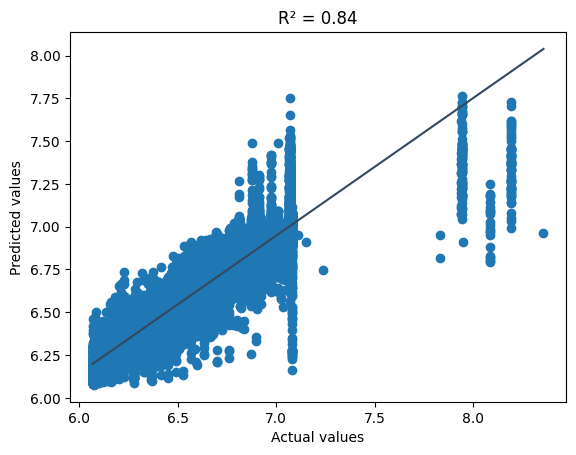

In [88]:
plt.scatter(y_test, y_test_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('R\u00B2 = %0.2f' % r2_score(y_test, y_test_pred))

plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_test_pred, 1))(np.unique(y_test)), color="#34495E")

plt.show()

### 2) Rigde Regressor

In [25]:
params ={'alpha' :[0.001, 0.1, 1, 10, 100, 1000]}
ridge_regressor =GridSearchCV(Ridge(), params ,cv =5,scoring = 'neg_mean_absolute_error', n_jobs =-1)
ridge_regressor.fit(X_train ,y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.1, 1, 10, 100, 1000]},
             scoring='neg_mean_absolute_error')

In [92]:
ridge_regressor.best_params_

{'alpha': 1000}

In [137]:
y_train_pred =ridge_regressor.predict(X_train) ##Predict train result
y_test_pred =ridge_regressor.predict(X_test) ##Predict test result

In [138]:
print("Train Results for Ridge Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", round(sqrt(mse(y_train.values, y_train_pred)),2))
print("R-squared: ", round(r2_score(y_train.values, y_train_pred),2))
print("Explained Variance Score:", round(explained_variance_score(y_train.values, y_train_pred),2))

Train Results for Ridge Regressor Model:
--------------------------------------------------
Root mean squared error:  0.16
R-squared:  0.68
Explained Variance Score: 0.68


In [139]:
print("Test Results for Ridge Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", round(sqrt(mse(y_test, y_test_pred)),2))
print("R-squared: ", round(r2_score(y_test, y_test_pred),2))
print("Explained Variance Score:", round(explained_variance_score(y_test, y_test_pred),2))

Test Results for Ridge Regressor Model:
--------------------------------------------------
Root mean squared error:  0.16
R-squared:  0.68
Explained Variance Score: 0.68


In [140]:
model_comparison["Ridge Regressor"]=[round(sqrt(mse(y_test, y_test_pred)),2),round(r2_score(y_test, y_test_pred),2)]

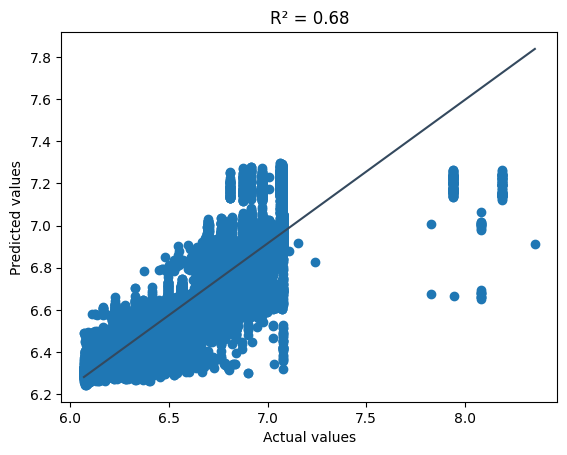

In [97]:
plt.scatter(y_test, y_test_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('R\u00B2 = %0.2f' % r2_score(y_test, y_test_pred))

plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_test_pred, 1))(np.unique(y_test)), color="#34495E")

plt.show()

### 3) Lasso Regressor

In [32]:
params ={'alpha' :[0.001, 0.01, 1, 10, 1000]}
lasso_regressor =GridSearchCV(Lasso(), params ,cv =15,scoring = 'neg_mean_absolute_error', n_jobs =-1)
lasso_regressor.fit(X_train ,y_train)

GridSearchCV(cv=15, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 1, 10, 1000]},
             scoring='neg_mean_absolute_error')

In [98]:
lasso_regressor.best_params_

{'alpha': 0.001}

In [141]:
y_train_pred =lasso_regressor.predict(X_train) ##Predict train result
y_test_pred =lasso_regressor.predict(X_test) ##Predict test result

In [142]:
print("Train Results for Lasso Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", round(sqrt(mse(y_train.values, y_train_pred)),2))
print("R-squared: ", round(r2_score(y_train.values, y_train_pred),2))
print("Explained Variance Score:", round(explained_variance_score(y_train.values, y_train_pred),2))

Train Results for Lasso Regressor Model:
--------------------------------------------------
Root mean squared error:  0.16
R-squared:  0.68
Explained Variance Score: 0.68


In [143]:
print("Test Results for Lasso Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", round(sqrt(mse(y_test, y_test_pred)),2))
print("R-squared: ", round(r2_score(y_test, y_test_pred),2))
print("Explained Variance Score:", round(explained_variance_score(y_test, y_test_pred),2))

Test Results for Lasso Regressor Model:
--------------------------------------------------
Root mean squared error:  0.16
R-squared:  0.68
Explained Variance Score: 0.68


In [144]:
model_comparison["Lasso Regressor"]=[round(sqrt(mse(y_test, y_test_pred)),2),round(r2_score(y_test, y_test_pred),2)]

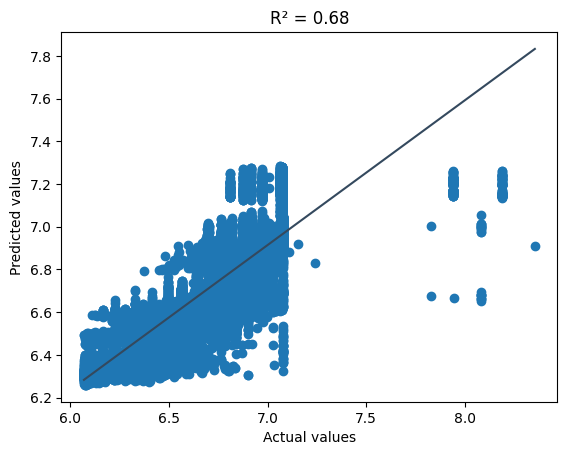

In [104]:
plt.scatter(y_test, y_test_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('R\u00B2 = %0.2f' % r2_score(y_test, y_test_pred))

plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_test_pred, 1))(np.unique(y_test)), color="#34495E")

plt.show()

### 4) Decision Tree Regressor

In [39]:
depth = list(range(10,20))
param_grid = dict(max_depth =depth)
tree = GridSearchCV(DecisionTreeRegressor(),param_grid,cv =10)
tree.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]})

In [105]:
tree.best_params_

{'max_depth': 19}

In [145]:
y_train_pred =tree.predict(X_train) ##Predict train result
y_test_pred =tree.predict(X_test) ##Predict test result

In [146]:
print("Train Results for Decision Tree Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", round(sqrt(mse(y_train.values, y_train_pred)),2))
print("R-squared: ", round(r2_score(y_train.values, y_train_pred),2))
print("Explained Variance Score:", round(explained_variance_score(y_train.values, y_train_pred),2))

Train Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  0.02
R-squared:  0.99
Explained Variance Score: 0.99


In [147]:
print("Test Results for Decision Tree Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", round(sqrt(mse(y_test, y_test_pred)),2))
print("R-squared: ", round(r2_score(y_test, y_test_pred),2))
print("Explained Variance Score:", round(explained_variance_score(y_test, y_test_pred),2))

Test Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  0.08
R-squared:  0.93
Explained Variance Score: 0.93


In [148]:
model_comparison["Desicion Tree Regressor"]=[round(sqrt(mse(y_test, y_test_pred)),2),round(r2_score(y_test, y_test_pred),2)]

### 5) Random Forest Regressor

In [45]:
tuned_params = {'n_estimators': [100,500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
random_regressor = RandomizedSearchCV(RandomForestRegressor(), tuned_params, n_iter = 20, scoring = 'neg_mean_absolute_error', cv = 5, n_jobs = -1)
random_regressor.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 300, 500]},
                   scoring='neg_mean_absolute_error')

In [110]:
random_regressor.best_params_

{'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1}

In [190]:
y_train_pred = random_regressor.predict(X_train)
y_test_pred = random_regressor.predict(X_test)

ValueError: X has 48 features, but RandomForestRegressor is expecting 28 features as input.

In [150]:
print("Train Results for Random Forest Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", round(sqrt(mse(y_train.values, y_train_pred)),2))
print("R-squared: ", round(r2_score(y_train.values, y_train_pred),2))
print("Explained Variance Score:", round(explained_variance_score(y_train.values, y_train_pred),2))

Train Results for Random Forest Regressor Model:
--------------------------------------------------
Root mean squared error:  0.02
R-squared:  0.99
Explained Variance Score: 0.99


In [151]:
print("Test Results for Random Forest Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", round(sqrt(mse(y_test, y_test_pred)),2))
print("R-squared: ", round(r2_score(y_test, y_test_pred),2))
print("Explained Variance Score:", round(explained_variance_score(y_test, y_test_pred),2))

Test Results for Random Forest Regressor Model:
--------------------------------------------------
Root mean squared error:  0.06
R-squared:  0.95
Explained Variance Score: 0.95


In [152]:
model_comparison["Random Forest Regressor"]=[round(sqrt(mse(y_test, y_test_pred)),2),round(r2_score(y_test, y_test_pred),2)]

In [ ]:
optimization_comparison["Random Forest Regressor"]=[round(sqrt(mse(y_test, y_test_pred)),2),round(r2_score(y_test, y_test_pred),2)]

### 6) XGBoost Regressor

In [51]:
tuned_params = {'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300, 400, 500], 'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]}
model = RandomizedSearchCV(XGBRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [1, 2, 3, 4, 5],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'reg_lambda': [0.001, 0.1, 1.0, 10.0,
                                                       100.0]},
                   scoring='neg_mean_absolute_error')

In [115]:
model.best_params_

{'reg_lambda': 1.0, 'n_estimators': 400, 'max_depth': 5, 'learning_rate': 0.1}

In [153]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [154]:
print("Train Results for XGBoost Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", round(sqrt(mse(y_train.values, y_train_pred)),2))
print("R-squared: ", round(r2_score(y_train.values, y_train_pred),2))
print("Explained Variance Score:", round(explained_variance_score(y_train.values, y_train_pred),2))

Train Results for XGBoost Regressor Model:
--------------------------------------------------
Root mean squared error:  0.09
R-squared:  0.9
Explained Variance Score: 0.9


In [155]:
print("Test Results for XGBoost Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", round(sqrt(mse(y_test, y_test_pred)),2))
print("R-squared: ", round(r2_score(y_test, y_test_pred),2))
print("Explained Variance Score:", round(explained_variance_score(y_test, y_test_pred),2))

Test Results for XGBoost Regressor Model:
--------------------------------------------------
Root mean squared error:  0.1
R-squared:  0.89
Explained Variance Score: 0.89


In [156]:
model_comparison["XGBoost Regressor"]=[round(sqrt(mse(y_test, y_test_pred)),2),round(r2_score(y_test, y_test_pred),2)]

### 7) SVR

In [120]:
svr = SVR(C=1.0, epsilon=0.2)
svr.fit(X_train, y_train)

In [157]:
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

In [158]:
print("Train Results for XGBoost Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", round(sqrt(mse(y_train.values, y_train_pred)),2))
print("R-squared: ", round(r2_score(y_train.values, y_train_pred),2))
print("Explained Variance Score:", round(explained_variance_score(y_train.values, y_train_pred),2))

Train Results for XGBoost Regressor Model:
--------------------------------------------------
Root mean squared error:  0.12
R-squared:  0.82
Explained Variance Score: 0.82


In [159]:
print("Test Results for XGBoost Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", round(sqrt(mse(y_test, y_test_pred)),2))
print("R-squared: ", round(r2_score(y_test, y_test_pred),2))
print("Explained Variance Score:", round(explained_variance_score(y_test, y_test_pred),2))

Test Results for XGBoost Regressor Model:
--------------------------------------------------
Root mean squared error:  0.12
R-squared:  0.82
Explained Variance Score: 0.82


In [160]:
model_comparison["SVR"]=[round(sqrt(mse(y_test, y_test_pred)),2),round(r2_score(y_test, y_test_pred),2)]

## ML Algorithm Comparison

In [161]:
df_comparison = pd.DataFrame.from_dict(model_comparison).T
df_comparison.columns = ['MSE', 'R2 Score']
df_comparison = df_comparison.sort_values('R2 Score', ascending=False)
df_comparison.style.background_gradient(cmap='Blues')

,MSE,R2 Score
Random Forest Regressor,0.060000,0.950000
Desicion Tree Regressor,0.080000,0.930000
XGBoost Regressor,0.100000,0.890000
KNN Regressor,0.110000,0.840000
SVR,0.120000,0.820000
Ridge Regressor,0.160000,0.680000
Lasso Regressor,0.160000,0.680000


### OPTIMAZING RANDOM FOREST REGRESSOR

In [164]:
df_opt = df.drop(["is_weekend","departure_month","part_of_month","checked_week_day","departure_week_day"], axis=1)

In [165]:
categorical_cols_opt = df_opt.select_dtypes(include=['category']).columns.to_list()

In [169]:
dummies_data = pd.get_dummies(df_opt[categorical_cols_opt])
df_updated_opt = pd.concat([df_opt.drop(categorical_cols_opt, axis=1), dummies_data], axis=1)

In [170]:
X_opt = df_updated_opt.drop(['price_try'], axis=1)

y_opt = df_updated_opt['price_try']

In [171]:
X_opt_scled = scaler.fit_transform(X_opt)

In [172]:
y_opt_log = np.log(y_opt)

In [173]:
X_train_opt, X_test_opt, y_train_opt, y_test_opt = train_test_split(X_opt_scled, y_opt_log, test_size = 0.2, random_state = 0)

In [174]:
random_regressor.fit(X_train_opt, y_train_opt)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 300, 500]},
                   scoring='neg_mean_absolute_error')

In [176]:
y_train_pred_opt = random_regressor.predict(X_train_opt)
y_test_pred_opt = random_regressor.predict(X_test_opt)

In [177]:
print("Train Results for Optimized Random Forest Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", round(sqrt(mse(y_train_opt.values, y_train_pred_opt)),2))
print("R-squared: ", round(r2_score(y_train_opt.values, y_train_pred_opt),2))
print("Explained Variance Score:", round(explained_variance_score(y_train_opt.values, y_train_pred_opt),2))

Train Results for Optimized Random Forest Regressor Model:
--------------------------------------------------
Root mean squared error:  0.02
R-squared:  0.99
Explained Variance Score: 0.99


In [178]:
print("Test Results for XGBoost Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", round(sqrt(mse(y_test_opt, y_test_pred_opt)),2))
print("R-squared: ", round(r2_score(y_test_opt, y_test_pred_opt),2))
print("Explained Variance Score:", round(explained_variance_score(y_test_opt, y_test_pred_opt),2))

Test Results for XGBoost Regressor Model:
--------------------------------------------------
Root mean squared error:  0.06
R-squared:  0.96
Explained Variance Score: 0.96


In [192]:
optimization_comparison["(Drop Least Imp Features)Random Forest Regressor"]=[round(sqrt(mse(y_test_opt, y_test_pred_opt)),2), round(r2_score(y_test_opt, y_test_pred_opt),2)]

In [195]:
optimization_comparison = pd.DataFrame.from_dict(optimization_comparison).T
optimization_comparison.columns = ['MSE', 'R2 Score']
optimization_comparison = optimization_comparison.sort_values('R2 Score', ascending=False)
optimization_comparison.style.background_gradient(cmap='Blues')

,MSE,R2 Score
Random Forest Regressor,0.060000,0.950000
Desicion Tree Regressor,0.080000,0.930000
XGBoost Regressor,0.100000,0.890000
KNN Regressor,0.110000,0.840000
SVR,0.120000,0.820000
Ridge Regressor,0.160000,0.680000
Lasso Regressor,0.160000,0.680000
